# Showing Data as RGB Images

This document demonstrates how to show data from the datacube as RGB images.

The following code loads the data as is done in the loading data document.

In [1]:
import datacube

# Allow importing of our utilities.
import sys
sys.path.append('../../Scripts')

In [2]:
dc = datacube.Datacube(app="04_Loading_data")

In [3]:
from deafrica_datahandling import load_ard

In [4]:
# Dar es Salaam, Tanzania - 2018
query = dict(dc=dc,
             min_gooddata=0.7,
             x=(39.20, 39.37),
             y=(-6.90, -6.70),
             time=("2018-01-01", "2018-12-31"),
             output_crs="EPSG:4326",
             resolution=(-0.00027, 0.00027),
             group_by='solar_day')

In [5]:
landsat_ds = load_ard(products=["ls7_usgs_sr_scene", "ls8_usgs_sr_scene"],
                      **query)

Using pixel quality parameters for USGS Collection 1
Finding datasets
    ls7_usgs_sr_scene
    ls8_usgs_sr_scene
Counting good quality pixels for each time step
Filtering to 4 out of 41 time steps with at least 70.0% good quality pixels
Applying pixel quality/cloud mask
Loading 4 time steps


## Showing an RGB representation of the data

To show RGB images of the data, the `rgb()` function first needs to be imported from our utilities.

In [6]:
from deafrica_plotting import rgb

The `rgb()` function has 2 main arguments:

- The first argument, `ds`, is the 2D xarray data to show. A 2D dataset (latitude/y, longitude/x dimensions) can be derived from a 3D dataset (latitude/y, longitude/x, time dimensions) by either using the [`sel()`](http://xarray.pydata.org/en/stable/generated/xarray.Dataset.sel.html) method of the 3D xarray to select a single time slice or by creating a time composite (or "mosaic") of the 3D xarray. We will learn about composites in session 3.
- The second argument, `bands`, is a list of the names of the data variables in `ds` to use as the red, green, and blue channels - in that order - in the RGB image.

There are also several other optional arguments:

- The argument `percentile_stretch` is a 2-tuple of floats in ascending order in the range \[0, 1\] which specify the lower and upper percentiles of the colour channel data to set to the minimum and maximum intensities in the image. If most of the image appears too dark, try decreasing the upper percentile (second value). If most of the image appears too bright, try increasing the lower percentile (first value).
- The argument `size` is the height of the figure. The larger `size` is, the larger the image will be. The default value is 6.
- The argument `savefig_path` is a path to export the RGB image to. For example, specifying `rgb.png` will create a PNG image called `rgb` in the same directory as the notebook that created it. By default, `rgb()` does not export an image. 
- The argument `savefig_kwargs` is an optional dictionary of keyword arguments that are passed to [`matplotlib.pyplot.savefig()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.savefig.html) when exporting.
- Other keyword arguments passed to `rgb()` will be passed to [`xarray.plot.imshow()`](http://xarray.pydata.org/en/v0.10.3/generated/xarray.plot.imshow.html).

For more information about `rgb()`, see its documentation.

Below are RGB images of the Landsat data near particular times. The white pixels are locations of missing or unclean data. In the case of Landsat data loaded with `load_ard()`, these areas are usually clouds or cloud shadow.

Here is the default output.

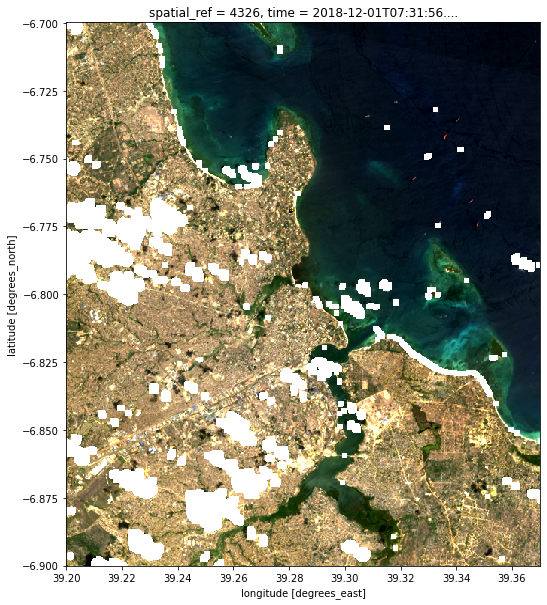

In [7]:
rgb(landsat_ds.sel(time="2018-12-01"), bands=['red', 'green', 'blue'], 
    size=10)

If the above image is considered to be too dark, too bright, or to not have enough contrast, the `percentile_stretch` argument can be used. Here, the lower percentile (first value) of `percentile_stretch` is increased from the default of `0.02` to `0.3` to darken the image and increase the contrast. The upper percentile (second value) is still the default of `0.98`.

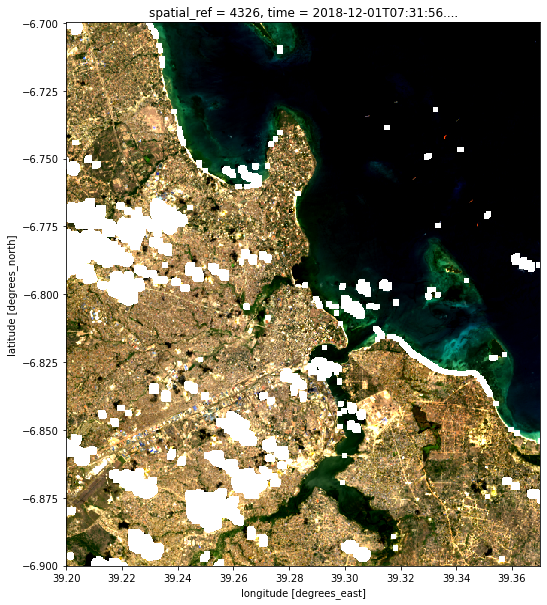

In [8]:
rgb(landsat_ds.sel(time="2018-12-01"), bands=['red', 'green', 'blue'], 
    percentile_stretch=(0.3, 0.98), size=10)

It is sometimes better to manually set the minimum and maximum values that correspond to the minimum and maximum intensities in the RGB image, such as when comparing images of the same area at different times. The `vmin` and `vmax` arguments set these minimum and maximum values.

The range of Landsat data is \[0, 10000\], but for this particular data, most values are in the range \[0, 2000\].

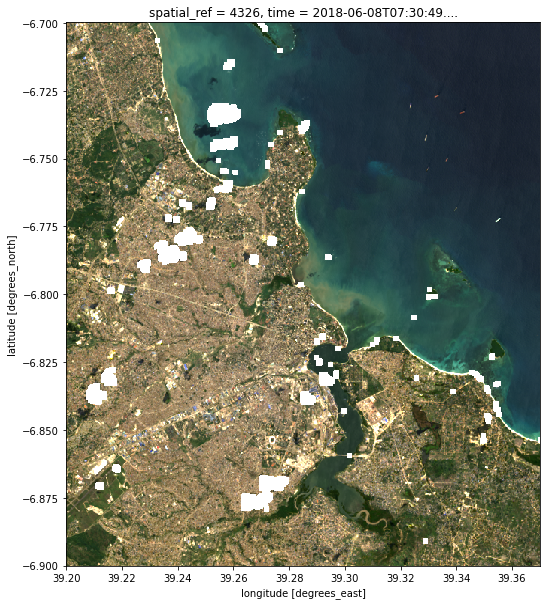

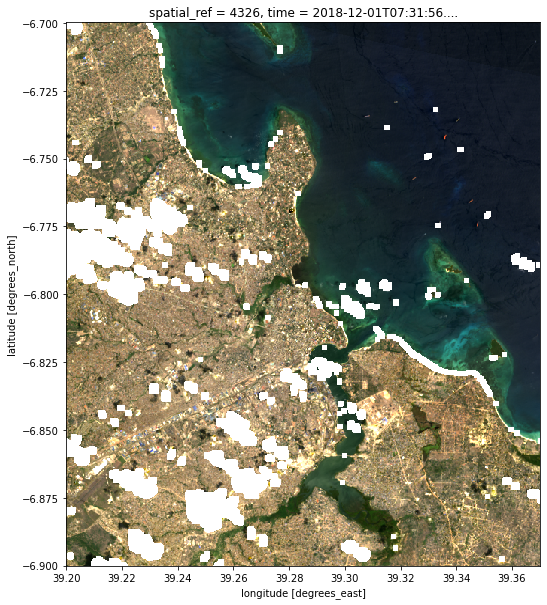

In [9]:
rgb(landsat_ds.sel(time="2018-06-08"), bands=['red', 'green', 'blue'], 
    vmin=0, vmax=2000, size=10)
rgb(landsat_ds.sel(time="2018-12-01"), bands=['red', 'green', 'blue'], 
    vmin=0, vmax=2000, size=10)